# This Lab was mostly copied, from the solution. But I added all the theory.

# Lab 5: Supervised Machine Learning - Wine Quality Classification

## Overview
In this lab, we'll explore **supervised machine learning** for classification tasks. Supervised learning uses labeled data (inputs with known outputs) to train models that can predict outcomes for new, unseen data.

### What is Classification?
Classification is a type of supervised learning where the goal is to predict discrete categories or classes. In this lab, we're predicting whether a wine is "high quality" (1) or "low quality" (0) based on its chemical properties.

### Algorithms Covered
1. **K-Nearest Neighbors (KNN)**: A simple, instance-based algorithm that classifies data points based on the majority class of their K nearest neighbors
2. **Support Vector Machine (SVM)**: A powerful algorithm that finds optimal decision boundaries (hyperplanes) to separate classes

### Learning Objectives
- Load and explore a real-world dataset
- Perform feature engineering and data preprocessing
- Train and optimize classification models
- Evaluate model performance using multiple metrics
- Compare different algorithms and kernels

In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 1. Import Libraries

### Key Libraries Explained:
- **pandas**: Data manipulation and analysis (DataFrames)
- **numpy**: Numerical computing and array operations
- **matplotlib & seaborn**: Data visualization
- **sklearn**: Scikit-learn, the main machine learning library

### Scikit-learn Modules:
- `train_test_split`: Splits data into training and testing sets
- `cross_val_score` & `GridSearchCV`: Model validation and hyperparameter tuning
- `KNeighborsClassifier`: K-Nearest Neighbors algorithm
- `SVC`: Support Vector Classifier
- `StandardScaler`: Feature normalization
- `confusion_matrix`, `classification_report`, `accuracy_score`: Model evaluation metrics

In [2]:
# Load the dataset
df = pd.read_csv('data/winequality-red.csv', sep=';')

# Display first few rows
display(df.head())

# Get summary information
df.info()

# Get descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Load and Explore the Dataset

### Dataset: Red Wine Quality
This dataset contains physicochemical properties of red wine samples and their quality ratings.

### Key Functions:
- **`pd.read_csv()`**: Loads CSV file into a pandas DataFrame. The `sep=';'` parameter specifies the delimiter
- **`df.head()`**: Shows the first 5 rows to understand data structure
- **`df.info()`**: Displays column names, data types, non-null counts, and memory usage
- **`df.describe()`**: Provides statistical summary (mean, std, min, max, quartiles) for numerical columns

### Why Explore Data?
Data exploration helps us:
1. Understand feature distributions
2. Identify potential issues (missing values, outliers)
3. Determine if preprocessing is needed
4. Get domain knowledge about the problem

In [3]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Check for Missing Values

### Function: `df.isnull().sum()`
- **`df.isnull()`**: Returns a DataFrame of True/False values indicating missing data
- **`.sum()`**: Counts True values (missing entries) for each column

### Why Check for Missing Values?
Missing data can:
- Cause errors during model training
- Introduce bias if not handled properly
- Reduce the amount of usable data

### Common Handling Strategies:
1. **Remove rows/columns** with missing values
2. **Impute** (fill) with mean, median, or mode
3. **Use algorithms** that handle missing values natively
4. **Create a missing indicator** feature

In this dataset, we should see 0 missing values for all columns.

In [4]:
# Convert 'quality' into binary classes
df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)

## 4. Feature Engineering: Binary Classification

### Converting to Binary Classes
The original 'quality' column contains ratings from 3-8. We convert this to a **binary classification problem**:
- **Class 1 (High Quality)**: quality >= 7
- **Class 0 (Low Quality)**: quality < 7

### Function: `np.where(condition, value_if_true, value_if_false)`
This is a vectorized conditional operation that efficiently applies the condition to all rows.

### Why Binary Classification?
1. **Simplifies** the problem (easier to learn patterns)
2. **More practical** for business decisions ("good" vs "not good")
3. **Better balance** if original multi-class distribution is skewed
4. Many algorithms perform better on binary problems

The new column `quality_binary` will be our **target variable** (what we want to predict).

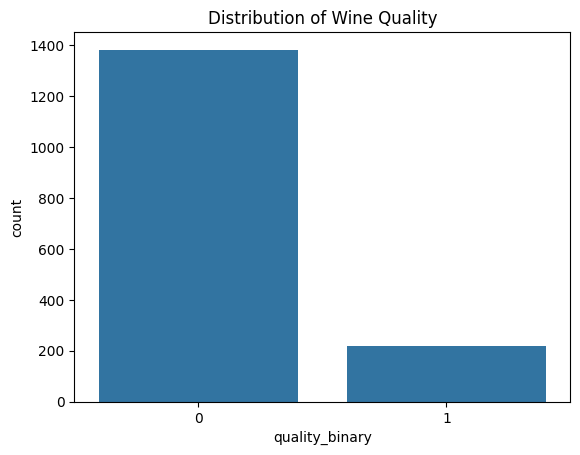

In [5]:
# Plot distribution
sns.countplot(x='quality_binary', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

## 5. Visualize Class Distribution

### Function: `sns.countplot()`
A seaborn function that creates a bar chart showing the count of observations in each category.

### Why Visualize Class Distribution?
Understanding class balance is critical:
- **Balanced classes** (roughly 50/50): Most algorithms work well
- **Imbalanced classes** (e.g., 90/10): May need special techniques like:
  - SMOTE (Synthetic Minority Oversampling)
  - Class weights
  - Different evaluation metrics (F1-score instead of accuracy)

If we see significant imbalance, we might need to adjust our approach or be careful about which metrics we use for evaluation.

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
# Separate features and target
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Before scaling
X.describe()


# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# After scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:\n", X['pH'].head(7))
print("\nAfter Scaling:\n", X_scaled_df['pH'].head(7))

Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
5    3.51
6    3.30
Name: pH, dtype: float64

After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
5    1.288643
6   -0.072005
Name: pH, dtype: float64


## 6. Feature Scaling (Normalization)

### Separating Features and Target
- **X** (Features): All columns except 'quality' and 'quality_binary' - these are our input variables
- **y** (Target): The 'quality_binary' column - this is what we want to predict

### Why Use StandardScaler?
Different features have different scales:
- pH: ranges from ~3-4
- Total sulfur dioxide: ranges from ~6-289

### The Problem with Different Scales:
Many ML algorithms (especially KNN and SVM) are **distance-based**. Features with larger ranges will dominate the distance calculations, giving them unfair importance.

### StandardScaler Formula:
**z = (x - μ) / σ**
- Subtracts the mean (μ) → centers data around 0
- Divides by standard deviation (σ) → scales to unit variance

### Result:
After scaling, all features have:
- Mean = 0
- Standard deviation = 1

This ensures all features contribute equally to the model, regardless of their original scale.

### Important: Fit on Training, Transform on Test
We use `fit_transform()` on training data and only `transform()` on test data to prevent **data leakage**.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 7. Train-Test Split

### Function: `train_test_split(X, y, test_size=0.3, random_state=42)`

### Parameters Explained:
- **X_scaled**: The normalized features
- **y**: The target variable (quality_binary)
- **test_size=0.3**: 30% of data goes to testing, 70% to training
- **random_state=42**: Sets the random seed for reproducibility (same split every time)

### Why Split the Data?

**Training Set (70%)**:
- Used to **train** the model
- Model learns patterns from this data

**Test Set (30%)**:
- Used to **evaluate** the model
- Model has never seen this data before
- Provides an unbiased estimate of performance

### The Golden Rule:
**Never train on test data!** This would cause **overfitting** - the model would memorize the test set and give falsely high accuracy scores.

### Result:
- `X_train`, `y_train`: Training features and labels
- `X_test`, `y_test`: Testing features and labels

In [9]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the optimal K
param_grid = {'n_neighbors': np.arange(1, 31)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Optimal K
optimal_k = knn_cv.best_params_['n_neighbors']
print(f"Optimal number of neighbors: {optimal_k}")

# Train the model with optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions
y_pred = knn_optimal.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Optimal number of neighbors: 4
Accuracy: 0.88125
Confusion Matrix:
[[398  15]
 [ 42  25]]


## 8. K-Nearest Neighbors (KNN) Algorithm

### What is KNN?
KNN is a **lazy learning** algorithm that classifies a data point based on how its neighbors are classified.

### How KNN Works:
1. Choose a value for K (number of neighbors)
2. For a new data point:
   - Calculate distance to all training points
   - Find the K nearest neighbors
   - Take a majority vote of their classes
   - Assign that class to the new point

### Example:
If K=5 and 4 neighbors are class 1, 1 neighbor is class 0 → predict class 1

### Finding Optimal K with GridSearchCV

**GridSearchCV** tests different values of K (1 to 30) and uses **cross-validation**:
- Splits training data into 5 folds
- Trains on 4 folds, validates on 1
- Repeats 5 times (each fold used once for validation)
- Averages performance across all folds
- Selects K with best average performance

### Why Cross-Validation?
Using a single train-test split can be misleading. Cross-validation provides a more robust estimate of model performance by testing on multiple different subsets.

### Hyperparameter Tuning:
K is a **hyperparameter** (not learned from data, must be set before training). Choosing the right K is crucial:
- **K too small (e.g., K=1)**: Sensitive to noise, overfitting
- **K too large**: Underfitting, misses local patterns
- **Optimal K**: Balance between bias and variance

### Evaluation Metrics:
- **Accuracy**: (TP + TN) / Total → percentage of correct predictions
- **Confusion Matrix**: Shows true positives, true negatives, false positives, false negatives

In [10]:
# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("SVM with Linear Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Linear Kernel - Accuracy: {accuracy_linear}")
print("Linear Kernel - Confusion Matrix:")
print(cm_linear)

print(f"RBF Kernel - Accuracy: {accuracy_rbf}")
print("RBF Kernel - Confusion Matrix:")
print(cm_rbf)


SVM with Linear Kernel:
Accuracy: 0.8604
Confusion Matrix:
[[413   0]
 [ 67   0]]
Linear Kernel - Accuracy: 0.8604166666666667
Linear Kernel - Confusion Matrix:
[[413   0]
 [ 67   0]]
RBF Kernel - Accuracy: 0.8833333333333333
RBF Kernel - Confusion Matrix:
[[403  10]
 [ 46  21]]


## 9. Support Vector Machine (SVM)

### What is SVM?
SVM finds the optimal **hyperplane** (decision boundary) that best separates classes with the maximum margin.

### Key Concepts:

**1. Hyperplane:**
- In 2D: a line
- In 3D: a plane
- In higher dimensions: a hyperplane

**2. Support Vectors:**
- The data points closest to the hyperplane
- These points "support" or define the decision boundary
- Removing other points doesn't change the hyperplane

**3. Margin:**
- The distance between the hyperplane and the nearest support vectors
- SVM maximizes this margin for better generalization

### Kernels: Handling Non-Linear Data

Real-world data is rarely linearly separable. **Kernels** transform data to higher dimensions where it becomes separable.

**Linear Kernel:**
- Decision boundary: straight line/plane
- Fast and simple
- Works well when data is already linearly separable
- Formula: K(x, y) = x · y

**RBF (Radial Basis Function) Kernel:**
- Also called Gaussian kernel
- Creates curved, flexible decision boundaries
- Can handle complex, non-linear patterns
- Maps data to infinite dimensions
- Formula: K(x, y) = exp(-γ ||x - y||²)
- More powerful but slower

### Which Kernel to Use?
- **Linear**: Try first, especially with many features
- **RBF**: Use when linear doesn't work well, data has non-linear patterns

### SVM with `decision_function()`
Unlike KNN's `predict_proba()`, SVM's `decision_function()` returns the signed distance from each sample to the hyperplane. Positive values → class 1, negative → class 0.

In [11]:
# Summary table of accuracy scores
summary = {
  'Classifier': ['KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)'],
  'Accuracy': [accuracy, accuracy_linear, accuracy_rbf]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

            Classifier  Accuracy
0                  KNN  0.881250
1  SVM (Linear Kernel)  0.860417
2     SVM (RBF Kernel)  0.883333


## 10. Model Comparison

### Comparing Classifiers
This summary table allows us to compare the three models side-by-side:
1. **KNN** with optimal K
2. **SVM with Linear Kernel**
3. **SVM with RBF Kernel**

### Interpreting Accuracy:
- **Higher accuracy** = better performance (more correct predictions)
- However, accuracy alone can be misleading, especially with imbalanced classes
- Example: If 90% of wines are low quality, a model that always predicts "low quality" would have 90% accuracy but be useless

### Additional Metrics to Consider:
- **Precision**: Of predicted high-quality wines, how many are actually high quality?
- **Recall**: Of actual high-quality wines, how many did we correctly identify?
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Area under the ROC curve (next section)

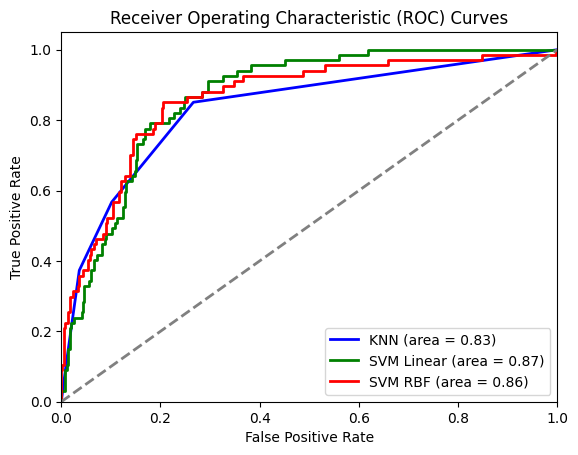

In [12]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_optimal.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, svm_linear.decision_function(X_test))
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, svm_rbf.decision_function(X_test))
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', lw=2, label='SVM Linear (area = %0.2f)' % roc_auc_svm_linear)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='red', lw=2, label='SVM RBF (area = %0.2f)' % roc_auc_svm_rbf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## 11. ROC Curve and AUC

### What is a ROC Curve?
**ROC** = Receiver Operating Characteristic

A graphical plot that shows the performance of a binary classifier at all classification thresholds.

### Key Components:

**True Positive Rate (TPR) / Sensitivity / Recall:**
- Y-axis
- Formula: TPR = TP / (TP + FN)
- "Of all actual positives, how many did we correctly identify?"

**False Positive Rate (FPR):**
- X-axis
- Formula: FPR = FP / (FP + TN)
- "Of all actual negatives, how many did we incorrectly classify as positive?"

### How to Read the ROC Curve:

**Perfect Classifier:**
- Curve goes straight up (TPR=1) then straight right
- AUC = 1.0

**Random Guessing:**
- Diagonal line from (0,0) to (1,1)
- AUC = 0.5
- No better than flipping a coin

**Good Classifier:**
- Curve bows toward the top-left corner
- AUC between 0.5 and 1.0
- Higher AUC = better discrimination

### AUC (Area Under Curve):
- **Single number** summarizing classifier performance
- **Interpretation**: Probability that the model ranks a random positive example higher than a random negative example
- **Scale**: 0 to 1
  - 0.5 = random
  - 0.7-0.8 = acceptable
  - 0.8-0.9 = excellent
  - 0.9+ = outstanding

### Why Use ROC/AUC?
1. **Threshold-independent**: Shows performance across all possible thresholds
2. **Works with imbalanced classes**: Unlike accuracy
3. **Easy comparison**: Single number (AUC) to compare models
4. **Visual**: See trade-off between sensitivity and specificity

### Reading This Plot:
- **Blue (KNN)**: Performance of K-Nearest Neighbors
- **Green (SVM Linear)**: Performance of linear SVM
- **Red (SVM RBF)**: Performance of RBF SVM
- **Gray diagonal**: Random classifier baseline

The curve furthest from the diagonal (highest AUC) is the best model.